In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict

from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image

import pydotplus

In [2]:
df = pd.read_csv('cardio_train.csv', sep=';',index_col='id')

In [3]:
df.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                          
0   18393       2     168    62.0    110     80            1     1      0   
1   20228       1     156    85.0    140     90            3     1      0   
2   18857       1     165    64.0    130     70            3     1      0   
3   17623       2     169    82.0    150    100            1     1      0   
4   17474       1     156    56.0    100     60            1     1      0   

    alco  active  cardio  
id                        
0      0       1       0  
1      0       1       1  
2      0       0       1  
3      0       1       1  
4      0       0       0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [5]:
"""
Data description
There are 3 types of input features:

Objective: factual information;
Examination: results of medical examination;
Subjective: information given by the patient.
Features:

Age | Objective Feature | age | int (days)
Height | Objective Feature | height | int (cm) |
Weight | Objective Feature | weight | float (kg) |
Gender | Objective Feature | gender | categorical code |
Systolic blood pressure | Examination Feature | ap_hi | int |
Diastolic blood pressure | Examination Feature | ap_lo | int |
Cholesterol | Examination Feature | cholesterol | 1: normal, 2: above normal, 3: well above normal |
Glucose | Examination Feature | gluc | 1: normal, 2: above normal, 3: well above normal |
Smoking | Subjective Feature | smoke | binary |
Alcohol intake | Subjective Feature | alco | binary |
Physical activity | Subjective Feature | active | binary |
Presence or absence of cardiovascular disease | Target Variable | cardio | binary |
All of the dataset values were collected at the moment of medical examination.
""";

In [6]:
df.describe()

age        gender        height        weight         ap_hi  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   19468.865814      1.349571    164.359229     74.205690    128.817286   
std     2467.251667      0.476838      8.210126     14.395757    154.011419   
min    10798.000000      1.000000     55.000000     10.000000   -150.000000   
25%    17664.000000      1.000000    159.000000     65.000000    120.000000   
50%    19703.000000      1.000000    165.000000     72.000000    120.000000   
75%    21327.000000      2.000000    170.000000     82.000000    140.000000   
max    23713.000000      2.000000    250.000000    200.000000  16020.000000   

              ap_lo   cholesterol          gluc         smoke          alco  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean      96.630414      1.366871      1.226457      0.088129      0.053771   
std      188.472530      0.680250      0.572270      0.283484      0.225568   
min      -70.000000      1.000000      1.000000      0.000000      0.000000   
25%       80.000000      1.000000      1.000000      0.000000      0.000000   
50%       80.000000      1.000000      1.000000      0.000000      0.000000   
75%       90.000000      2.000000      1.000000      0.000000      0.000000   
max    11000.000000      3.000000      3.000000      1.000000      1.000000   

             active        cardio  
count  70000.000000  70000.000000  
mean       0.803729      0.499700  
std        0.397179      0.500003  
min        0.000000      0.000000  
25%        1.000000      0.000000  
50%        1.000000      0.000000  
75%        1.000000      1.000000  
max        1.000000      1.000000

In [7]:
df1 = df.copy()

In [8]:
df1.head()

age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
id                                                                          
0   18393       2     168    62.0    110     80            1     1      0   
1   20228       1     156    85.0    140     90            3     1      0   
2   18857       1     165    64.0    130     70            3     1      0   
3   17623       2     169    82.0    150    100            1     1      0   
4   17474       1     156    56.0    100     60            1     1      0   

    alco  active  cardio  
id                        
0      0       1       0  
1      0       1       1  
2      0       0       1  
3      0       1       1  
4      0       0       0

In [9]:
df1.describe()

age        gender        height        weight         ap_hi  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean   19468.865814      1.349571    164.359229     74.205690    128.817286   
std     2467.251667      0.476838      8.210126     14.395757    154.011419   
min    10798.000000      1.000000     55.000000     10.000000   -150.000000   
25%    17664.000000      1.000000    159.000000     65.000000    120.000000   
50%    19703.000000      1.000000    165.000000     72.000000    120.000000   
75%    21327.000000      2.000000    170.000000     82.000000    140.000000   
max    23713.000000      2.000000    250.000000    200.000000  16020.000000   

              ap_lo   cholesterol          gluc         smoke          alco  \
count  70000.000000  70000.000000  70000.000000  70000.000000  70000.000000   
mean      96.630414      1.366871      1.226457      0.088129      0.053771   
std      188.472530      0.680250      0.572270      0.283484      0.225568   
min      -70.000000      1.000000      1.000000      0.000000      0.000000   
25%       80.000000      1.000000      1.000000      0.000000      0.000000   
50%       80.000000      1.000000      1.000000      0.000000      0.000000   
75%       90.000000      2.000000      1.000000      0.000000      0.000000   
max    11000.000000      3.000000      3.000000      1.000000      1.000000   

             active        cardio  
count  70000.000000  70000.000000  
mean       0.803729      0.499700  
std        0.397179      0.500003  
min        0.000000      0.000000  
25%        1.000000      0.000000  
50%        1.000000      0.000000  
75%        1.000000      1.000000  
max        1.000000      1.000000

In [10]:
df1['age'] = df1['age']/365
df1["age"] = df1['age'].apply(np.ceil)
df1.columns

Index(['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol',
       'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [11]:
df1 = df1[(df1['ap_hi']<=250) & (df1['ap_hi']>=50) & (df1['ap_lo']<=160) & (df1['ap_hi']>=df['ap_lo']) & (df['ap_lo']<=df['ap_hi']) & (df['ap_lo'] >=40) & (df['weight'] > 35) & (df['height']>100) & (df['height']<210)]

In [12]:
#engineered a feature
df1['BMI'] = round(df1['weight']/((df1['height']/100).apply(np.square)),2)
df1 = df1[(df1['BMI'] >= 12.5) & (df1['BMI'] <= 50)]
# here we are trying to model the general population at risk of heart disease 
# thus we need to remove outliers again as some height weight combinations produce really high BMIs so
# we are removing combinations with BMI as high as 54 and as low as 
#http://www.ideal-weight-charts.com/body-mass-index-chart.html
#https://cdn-prod.medicalnewstoday.com/content/images/info/obesity/bmi-chart-underweight-to-overweight.png

#12-18 under weight 
#18-<25 healthy 
#25-<30 over weight 
#30-<40 obese  
#40-50 morbid obese 
#https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5728753/

# Continue from mid term report

In [13]:
df1.describe()

age        gender        height        weight         ap_hi  \
count  68415.000000  68415.000000  68415.000000  68415.000000  68415.000000   
mean      53.824161      1.349061    164.449331     73.973294    126.642798   
std        6.769472      0.476677      7.844036     13.927486     16.662197   
min       30.000000      1.000000    120.000000     35.450000     60.000000   
25%       49.000000      1.000000    159.000000     65.000000    120.000000   
50%       54.000000      1.000000    165.000000     72.000000    120.000000   
75%       59.000000      2.000000    170.000000     82.000000    140.000000   
max       65.000000      2.000000    207.000000    180.000000    240.000000   

              ap_lo   cholesterol          gluc         smoke          alco  \
count  68415.000000  68415.000000  68415.000000  68415.000000  68415.000000   
mean      81.288548      1.364058      1.224965      0.088095      0.053365   
std        9.420322      0.678437      0.570754      0.283435      0.224763   
min       40.000000      1.000000      1.000000      0.000000      0.000000   
25%       80.000000      1.000000      1.000000      0.000000      0.000000   
50%       80.000000      1.000000      1.000000      0.000000      0.000000   
75%       90.000000      1.000000      1.000000      0.000000      0.000000   
max      160.000000      3.000000      3.000000      1.000000      1.000000   

             active        cardio           BMI  
count  68415.000000  68415.000000  68415.000000  
mean       0.803362      0.494219     27.384206  
std        0.397459      0.499970      5.040399  
min        0.000000      0.000000     13.520000  
25%        1.000000      0.000000     23.880000  
50%        1.000000      0.000000     26.300000  
75%        1.000000      1.000000     30.120000  
max        1.000000      1.000000     50.000000

In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68415 entries, 0 to 99999
Data columns (total 13 columns):
age            68415 non-null float64
gender         68415 non-null int64
height         68415 non-null int64
weight         68415 non-null float64
ap_hi          68415 non-null int64
ap_lo          68415 non-null int64
cholesterol    68415 non-null int64
gluc           68415 non-null int64
smoke          68415 non-null int64
alco           68415 non-null int64
active         68415 non-null int64
cardio         68415 non-null int64
BMI            68415 non-null float64
dtypes: float64(3), int64(10)
memory usage: 7.3 MB


In [15]:
df1.corr()['cardio'].sort_values()

active        -0.037681
smoke         -0.016262
height        -0.011501
alco          -0.008376
gender         0.007578
gluc           0.088844
weight         0.180719
BMI            0.192742
cholesterol    0.221516
age            0.239497
ap_lo          0.340286
ap_hi          0.428226
cardio         1.000000
Name: cardio, dtype: float64

In [101]:
#since datatset is large we split it 85% training 15% testing

In [49]:
features = df1.drop(columns=['cardio'])
features_2 = df1.drop(columns=['cardio','alco','smoke','active'])
targets = pd.DataFrame(df1['cardio'])

X_train, X_test, Y_train, Y_test = train_test_split(features, targets, test_size = 0.15, random_state =42)
X_train_2, X_test_2, Y_train, Y_test = train_test_split(features_2, targets, test_size = 0.15, random_state =42)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(X_train_2.shape)
print(X_test_2.shape)

(58152, 12)
(10263, 12)
(58152, 1)
(10263, 1)
(58152, 9)
(10263, 9)


In [50]:
def mae(y_true, y_pred):
    return 100*np.mean(abs(y_true - y_pred))

baseline_guess = (np.median(Y_train))

print("The baseline guess is ",baseline_guess)
print("The baseline performance on the test set: accuracy = %0.4f" % (mae(Y_test,baseline_guess)))

The baseline guess is  0.0
The baseline performance on the test set: accuracy = 49.9562


In [96]:
#don't run 
# this is selecting the best classifier on train set 1

In [18]:
sgd = linear_model.SGDClassifier(max_iter=50, tol=None)
sgd.fit(X_train,Y_train);
acc_sgd = round(sgd.score(X_train, Y_train)*100, 2)

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train,Y_train);
acc_random_forest = round(random_forest.score(X_train, Y_train)*100, 2)

logreg = LogisticRegression()
logreg.fit(X_train, Y_train);
acc_log = round(logreg.score(X_train, Y_train)*100,2)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train);
acc_knn = round(knn.score(X_train, Y_train)*100,2)

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train);
acc_gaussian = round(gaussian.score(X_train,Y_train)*100,2)

perceptron = Perceptron(max_iter = 50)
perceptron.fit(X_train,Y_train);
acc_perceptron = round(perceptron.score(X_train,Y_train)*100,2)

linear_svc = LinearSVC(C=100)
linear_svc.fit(X_train,Y_train);
acc_linear_svc = round(linear_svc.score(X_train, Y_train)*100,2)

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train);
acc_decision_tree = round(decision_tree.score(X_train, Y_train)*100,2)



results = pd.DataFrame(
{
    'Model': ['SVM', 'KNN', "Log Reg", "Random Forest", "Naive Bayes", "Perceptron", "SGD", "Decision Tree"],
    'Score': [acc_linear_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron, acc_sgd, acc_decision_tree]
})

results_df = results.sort_values(by='Score',ascending=False)
results_df = results_df.set_index('Score')
results_df

/Users/karanmaheshwari/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Users/karanmaheshwari/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karanmaheshwari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/Users/karanmaheshwari/anaconda3/lib/

Model
Score               
98.11  Random Forest
98.11  Decision Tree
77.89            KNN
72.74        Log Reg
70.67    Naive Bayes
69.25            SGD
64.12     Perceptron
54.70            SVM

In [98]:
#You can use the result above (comparision of models)
#don't run 
# this is selecting the best classifier on train set 2

In [19]:
# We can also observe now that


#Please check the parameters loss function, regularization in the documentation

sgd = linear_model.SGDClassifier(max_iter=10, tol=None)
sgd.fit(X_train_2,Y_train)
acc_sgd = round(sgd.score(X_train_2, Y_train)*100, 2)
print("SGD trained succesfully")

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_2,Y_train)
acc_random_forest = round(random_forest.score(X_train_2, Y_train)*100, 2)
print("Random Forest trained succesfully")


logreg = LogisticRegression()
logreg.fit(X_train_2, Y_train)
acc_log = round(logreg.score(X_train_2, Y_train)*100,2)
print("Logistic Regression trained succesfully")


knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_2, Y_train)
acc_knn = round(knn.score(X_train_2, Y_train)*100,2)
print("KNN trained succesfully")


gaussian = GaussianNB()
gaussian.fit(X_train_2, Y_train)
acc_gaussian = round(gaussian.score(X_train_2,Y_train)*100,2)
print("Gaussian Naive Bayes trained succesfully")


perceptron = Perceptron(max_iter = 10)
perceptron.fit(X_train_2,Y_train)
acc_perceptron = round(perceptron.score(X_train_2,Y_train)*100,2)
print("Perceptron trained succesfully")


linear_svc = LinearSVC(C=100)
linear_svc.fit(X_train_2,Y_train)
acc_linear_svc = round(linear_svc.score(X_train_2, Y_train)*100,2)
print("SVM trained succesfully")


decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_2, Y_train)
acc_decision_tree = round(decision_tree.score(X_train_2, Y_train)*100,2)
print("Decision Trees trained succesfully")


results = pd.DataFrame(
{
    'Model': ['SVM', 'KNN', "Log Reg", "Random Forest", "Naive Bayes", "Perceptron", "SGD", "Decision Tree"],
    'Score': [acc_linear_svc, acc_knn, acc_log, acc_random_forest, acc_gaussian, acc_perceptron, acc_sgd, acc_decision_tree]
})

results_df = results.sort_values(by='Score',ascending=False)
results_df = results_df.set_index('Score')
results_df

/Users/karanmaheshwari/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Users/karanmaheshwari/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karanmaheshwari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


SGD trained succesfully
Random Forest trained succesfully


/Users/karanmaheshwari/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/karanmaheshwari/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression trained succesfully


/Users/karanmaheshwari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


KNN trained succesfully
Gaussian Naive Bayes trained succesfully
Perceptron trained succesfully


/Users/karanmaheshwari/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/karanmaheshwari/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:183: FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. Specify tol to silence this warning.
  FutureWarning)
/Users/karanmaheshwari/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/

SVM trained succesfully
Decision Trees trained succesfully


Model
Score               
96.30  Random Forest
96.30  Decision Tree
74.81            KNN
72.57        Log Reg
70.68    Naive Bayes
63.24     Perceptron
50.62            SGD
50.54            SVM

In [100]:
#comparision of models on train set 2^^^^^

In [102]:
#this is \/ 10 fold cross validation

In [52]:
# Don't run this long time 


#here we have two different training sets based on the Pearson correlation we saw earlier
# We need to see which training subset to choose from
random_forest1 = RandomForestClassifier(n_estimators=100)
random_forest1.fit(X_train,Y_train);
scores1 = cross_val_score(random_forest1, X_train, Y_train, cv=10, scoring='accuracy')

random_forest2 = RandomForestClassifier(n_estimators=100)
random_forest2.fit(X_train_2,Y_train);
scores2 = cross_val_score(random_forest2, X_train_2, Y_train, cv=10, scoring='accuracy')


print("Scores of model 1 with X_train 1: ", scores1)
print("Mean of scores1: ", 100*scores1.mean())
print("Std Deviation of scores1: ", scores1.std(),"\n\n\n")

print("Scores of model 2 with X_train 2: ", scores2)
print("Mean of scores2: ", 100*scores2.mean())
print("Std Deviation of scores2: ", scores2.std())

Scores of model 1 with X_train 1:  [0.69816836 0.71141855 0.71628995 0.70473592 0.71331125 0.70512571
 0.69635549 0.71116741 0.71208577 0.7165692 ]
Mean of scores1:  70.85227592695308
Std Deviation of scores1:  0.006761768913436046 



Scores of model 2 with X_train 2:  [0.69704264 0.69222834 0.69893398 0.70323246 0.70392022 0.6966466
 0.69406707 0.70106639 0.71448228 0.71517028]
Mean of scores2:  70.16790259900283
Std Deviation of scores2:  0.007452267115960629


In [ ]:
#Our model achieves similar results with both the trainin set version.
#Therefor we will select one with less features. Such that variance is less and model is less complex.

In [53]:
imp1 = pd.DataFrame({'features': X_train.columns, 'importance': np.round(random_forest1.feature_importances_, 3)})
imp1 = imp1.sort_values('importance',ascending=False).set_index('features')
print(imp1)

imp2 = pd.DataFrame({'features': X_train_2.columns, 'importance': np.round(random_forest2.feature_importances_, 3)})
imp2 = imp2.sort_values('importance',ascending=False).set_index('features')
print(imp2)

             importance
features               
BMI               0.191
ap_hi             0.170
age               0.162
weight            0.139
height            0.133
ap_lo             0.093
cholesterol       0.040
gender            0.020
gluc              0.019
active            0.016
smoke             0.009
alco              0.008
             importance
features               
BMI               0.201
ap_hi             0.173
age               0.165
weight            0.142
height            0.136
ap_lo             0.098
cholesterol       0.040
gender            0.023
gluc              0.021


In [ ]:
# We will go ahead with 2nd train_set since it has low variance. 

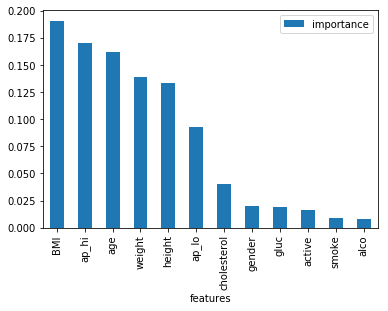

In [33]:
imp1.plot.bar();

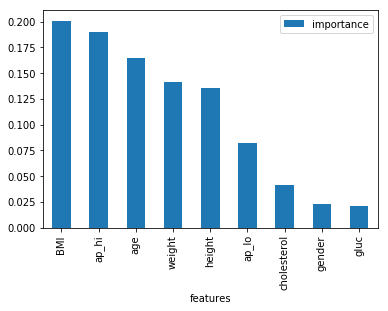

In [34]:
imp2.plot.bar();

In [104]:
# Graphs of ^^^ feature importance

In [54]:
random_forest2 = RandomForestClassifier(n_estimators=100, max_features = 9, oob_score=True)
random_forest2.fit(X_train_2, Y_train)
Y_pred = random_forest2.predict(X_test_2)
print("Train Accuracy: ",round(random_forest2.score(X_train_2,Y_train)*100,2))

from sklearn.metrics import accuracy_score

print("Test Accuracy: ",accuracy_score(Y_test, Y_pred))


/Users/karanmaheshwari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


Train Accuracy:  96.99
Test Accuracy:  0.6872259573224203


In [24]:
#clearly the model is suffering from overfiting let's tune some hyper parameters to reduce the variance

In [103]:
#Don't run this only pain follows
#Grid Seacrh on a 3 fold cross validation
# Compared 4200 differnt Random Forests and came up with the following parameters of 

#criterion = 'entropy', n_estimators=700, max_leaf_nodes = 200, max_features='auto', 
#max_depth = 20 , min_samples_split= 100

In [83]:
param_grid = {
    'max_depth' : [5,10,15,20,30],
    'criterion' : ['gini','entropy'],
    'n_estimators' : [50,100,200,400,500,700,1000],
    'max_features': ['auto',5,8],
    'max_leaf_nodes': [100,200,300,500,700]
    'min_samples_split' : [20,50,100,200]
}

rf = RandomForestClassifier(n_estimators=700,max_depth = 20,criterion='entropy', max_features='auto',max_leaf_nodes = 200, random_state=1,n_jobs=-1)
clf = GridSearchCV(estimator = rf, param_grid = param_grid, n_jobs=-1)

clf.fit(X_train_2,Y_train)
#clf.bestparams_

/Users/karanmaheshwari/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/karanmaheshwari/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:740: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=20, max_features='auto', max_leaf_nodes=200,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=-1,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_split': [20, 50, 100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [94]:
final_model = RandomForestClassifier(criterion = 'entropy', n_estimators=700, max_leaf_nodes = 200, max_features='auto', 
                                     max_depth = 20 , min_samples_split= 100, random_state=1,n_jobs=-1)
final_model.fit(X_train_2, Y_train)

Y_pred = final_model.predict(X_test_2)
print("Train Accuracy: ",round(final_model.score(X_train_2,Y_train)*100,2))

from sklearn.metrics import accuracy_score

print("Test Accuracy: ",100*accuracy_score(Y_test, Y_pred))

from sklearn.metrics import classification_report


/Users/karanmaheshwari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Train Accuracy:  74.47
Test Accuracy:  73.56523433693852


In [106]:
(tn, fp, fn, tp) = confusion_matrix(Y_test, Y_pred).ravel()
print("Classification Report :",classification_report(Y_test,Y_pred))
print("True Positive :",tp)
print("True Negative :",tn)
print("False Positive :",fp)
print("False Negative :",fn)

print("Specificity :", tn/(tn+fp))
print("Sensitivity :", tp/(tp+fn))

Classification Report :               precision    recall  f1-score   support

           0       0.71      0.78      0.75      5136
           1       0.76      0.69      0.72      5127

   micro avg       0.74      0.74      0.74     10263
   macro avg       0.74      0.74      0.73     10263
weighted avg       0.74      0.74      0.74     10263

True Positive : 3520
True Negative : 4030
False Positive : 1106
False Negative : 1607
Specificity : 0.7846573208722741
Sensitivity : 0.6865613419153501


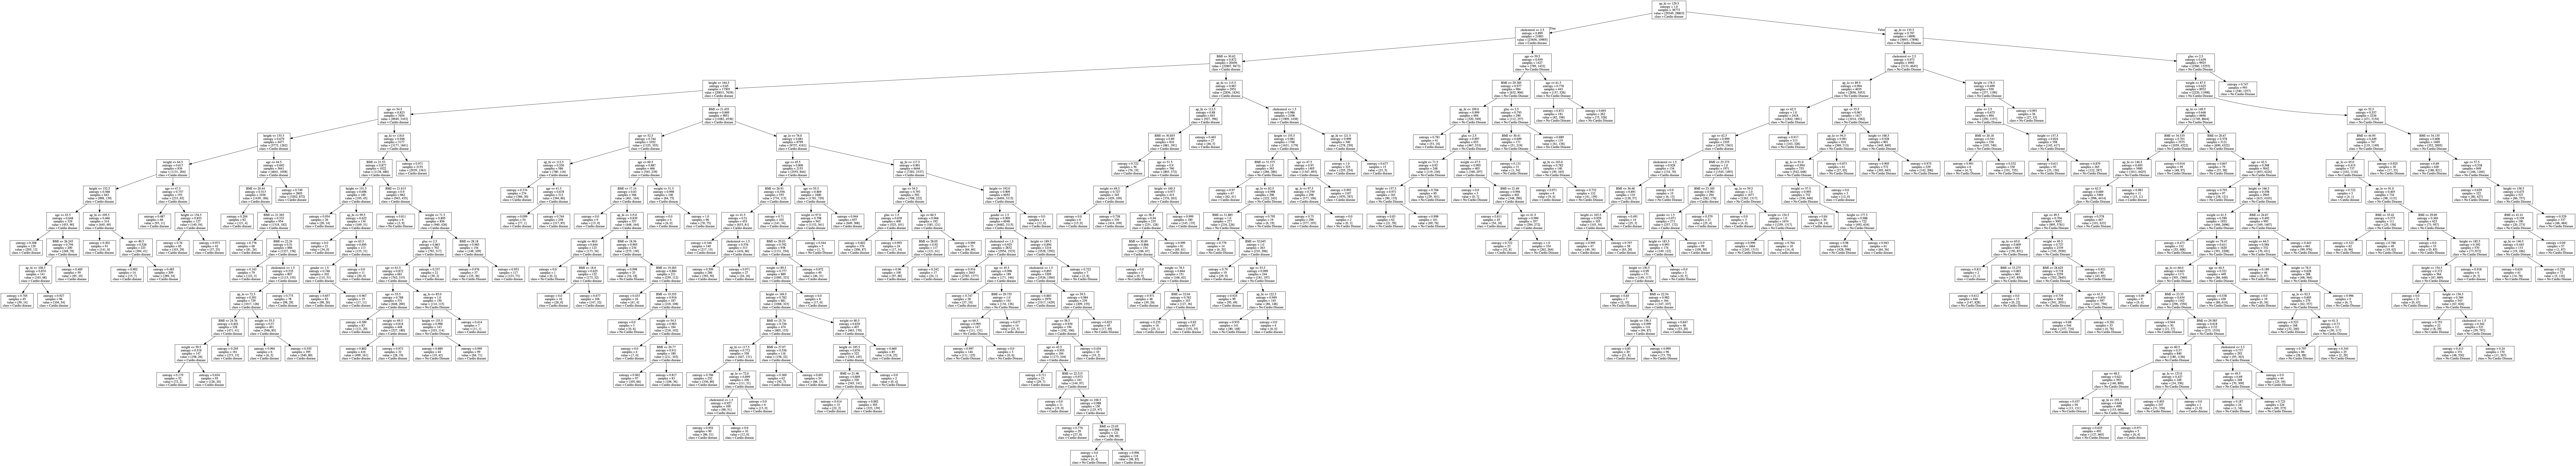

In [107]:
import pydotplus
dot_data = StringIO()
tree = final_model.estimators_[10]
features = list(X_train_2.columns)
export_graphviz(tree, out_file=dot_data,feature_names = features, class_names = ['Cardio disease','No Cardio Disease'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png = ('tree.png')
Image(graph.create_png())

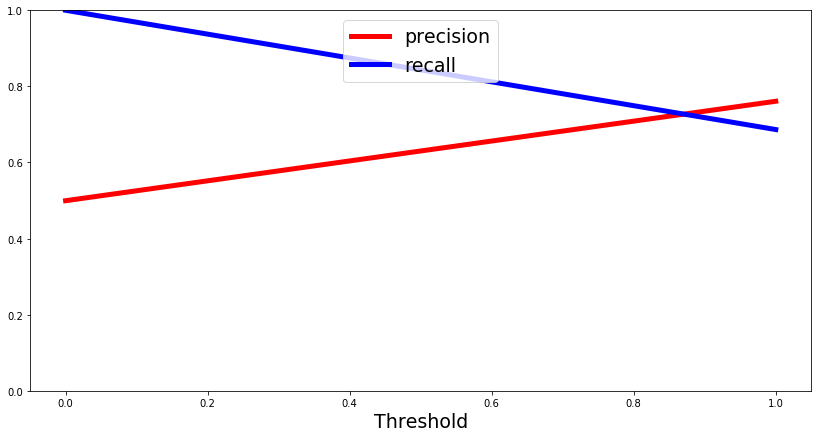

In [109]:
#Y_scores = final_model.predict_proba(X_test_2)
#need to be sure if Y_score or Y_pred needs to be put

prec, rec, thres = precision_recall_curve(Y_test, Y_pred)

def plot_precision_recall(prec, recall, thres):
    plt.plot(thres, prec[:-1],"r-",label="precision",linewidth=5)
    plt.plot(thres, rec[:-1],"b",label="recall",linewidth=5)
    plt.xlabel("Threshold", fontsize=19)
    plt.legend(loc=9,fontsize=19)
    plt.ylim([0,1])
plt.figure(figsize=(14,7))
plot_precision_recall(prec, rec, thres)

plt.savefig('Precision Recall.png')
plt.show()

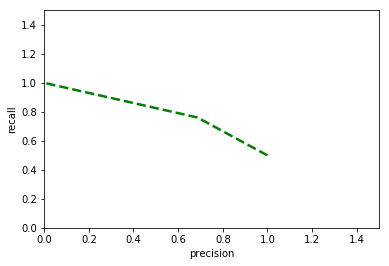

In [110]:
def plot_precision_vs_recall(prec, rec):
    plt.plot(rec, prec, "g--", linewidth=2.5)
    plt.ylabel("recall")
    plt.xlabel("precision")
    plt.axis([0,1.5,0,1.5])
plt.figure()
plot_precision_vs_recall(prec,rec)
plt.savefig('Prec_vs_recall.png')
plt.show()

In [112]:
#talk about the math of the ROC (write full form) curves and ROC AUC score (roc area under curve)

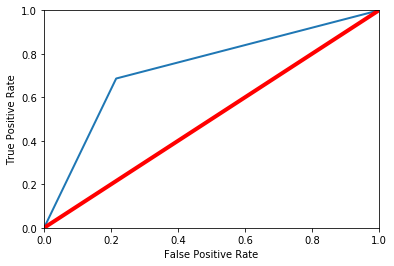

In [113]:
fpr, tpr, thresh = roc_curve(Y_test, Y_pred)
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2, label=label)
    plt.plot([0,1],[0,1],'r',linewidth=4)
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    
plt.figure()
plot_roc_curve(fpr, tpr)
plt.savefig("ROC Curve.png")
plt.show()

In [114]:
r_a_score = roc_auc_score(Y_test,Y_scores[:,1])
print("ROC_AUC_SCORE: ",r_a_score)

ROC_AUC_SCORE:  0.8001272924721422


# MIDTERM REPORT WORK  no need to follow

# Data Visualisation/  Exploratory Analysis

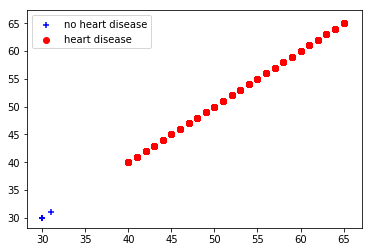

In [41]:
#import pandas as pd
#d2 = df2.sort_values(by ='Yi' )
idx_1 = np.where(df['cardio'] == 0)
idx_2 = np.where(df['cardio'] == 1)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(df.iloc[idx_1]['age'],df.iloc[idx_1]['age'], c='b', marker="+", label='no heart disease')
ax1.scatter(df.iloc[idx_2]['age'],df.iloc[idx_2]['age'], c='r', marker="o", label='heart disease')
plt.legend()
plt.show()

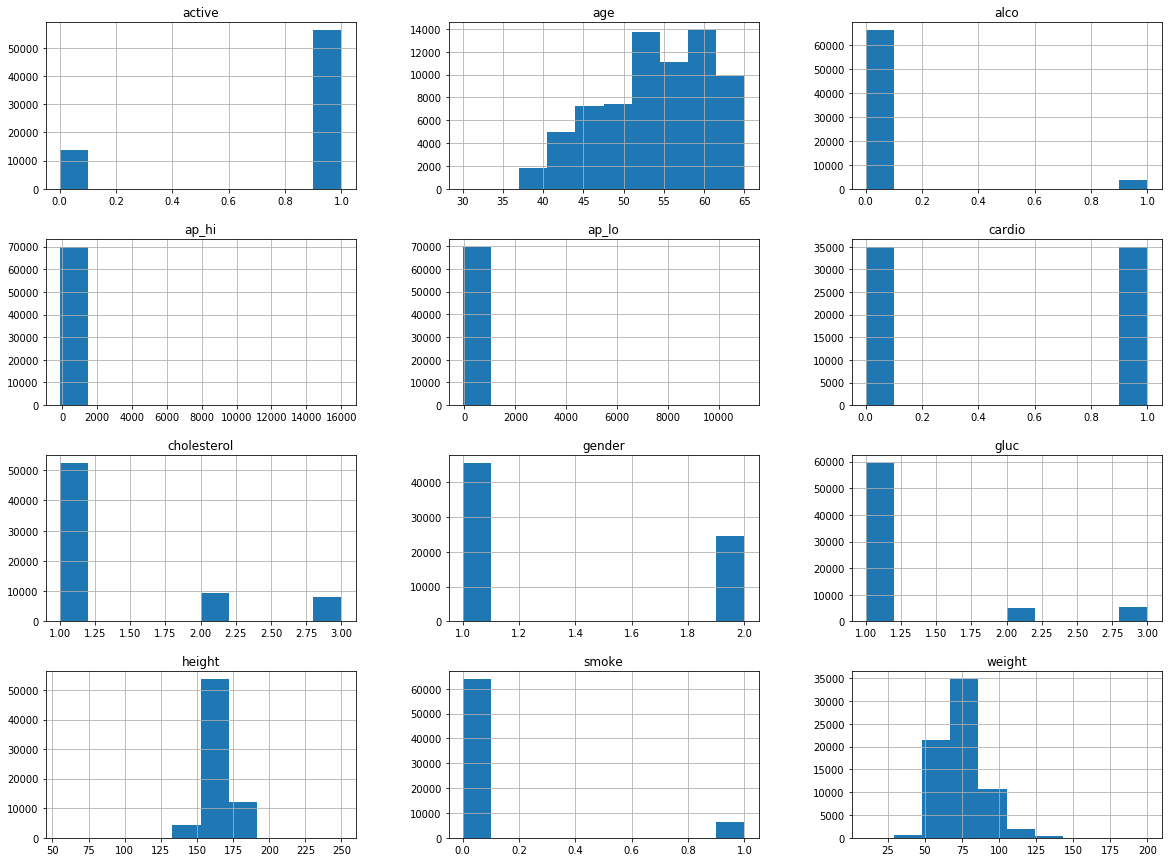

In [52]:
df.hist(bins=10,figsize=(20,15))
plt.show()

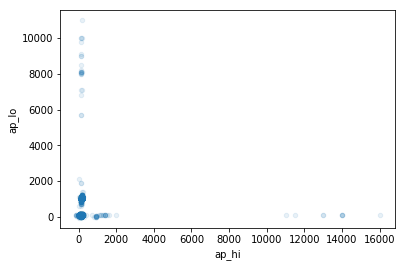

In [53]:
df.plot(kind = "scatter", x = "ap_hi", y = "ap_lo", alpha = 0.1 ) 

In [95]:
df[df['ap_lo']<= df['ap_hi']].describe()

age        gender        height        weight         ap_hi  \
count  68766.000000  68766.000000  68766.000000  68766.000000  68766.000000   
mean      53.824870      1.348617    164.359916     74.114962    128.839601   
std        6.769648      0.476536      8.190703     14.332163    155.201462   
min       30.000000      1.000000     55.000000     11.000000     12.000000   
25%       49.000000      1.000000    159.000000     65.000000    120.000000   
50%       54.000000      1.000000    165.000000     72.000000    120.000000   
75%       59.000000      2.000000    170.000000     82.000000    140.000000   
max       65.000000      2.000000    250.000000    200.000000  16020.000000   

              ap_lo   cholesterol          gluc         smoke          alco  \
count  68766.000000  68766.000000  68766.000000  68766.000000  68766.000000   
mean      81.245776      1.364657      1.225577      0.087878      0.053340   
std        9.694132      0.678876      0.571441      0.283119      0.224713   
min      -70.000000      1.000000      1.000000      0.000000      0.000000   
25%       80.000000      1.000000      1.000000      0.000000      0.000000   
50%       80.000000      1.000000      1.000000      0.000000      0.000000   
75%       90.000000      2.000000      1.000000      0.000000      0.000000   
max      182.000000      3.000000      3.000000      1.000000      1.000000   

             active        cardio  
count  68766.000000  68766.000000  
mean       0.803449      0.494765  
std        0.397392      0.499976  
min        0.000000      0.000000  
25%        1.000000      0.000000  
50%        1.000000      0.000000  
75%        1.000000      1.000000  
max        1.000000      1.000000

In [103]:
#temp2 = len(df[(df[attributes_y[0]] == avlist_y[0]) & (df[attributes_x[0]] == avlist_x[0]) & (df[attributes_x[1]] == avlist_x[1])])
        
mask1 = (df['ap_hi']<=250) & (df['ap_hi']>=df['ap_lo']) & (df['ap_lo']<=df['ap_hi']) & (df['ap_lo'] >=30) & (df['weight'] > 35) & (df['height']>100) & (df['height']<210)

#df[df[mask]].describe()
df_mask1 = df[mask1]

In [107]:
df_mask1.describe()

age        gender        height        weight         ap_hi  \
count  68630.000000  68630.000000  68630.000000  68630.000000  68630.000000   
mean      53.826344      1.348667    164.400685     74.129738    126.678537   
std        6.768707      0.476552      7.961879     14.297368     16.695001   
min       30.000000      1.000000    104.000000     35.450000     60.000000   
25%       49.000000      1.000000    159.000000     65.000000    120.000000   
50%       54.000000      1.000000    165.000000     72.000000    120.000000   
75%       59.000000      2.000000    170.000000     82.000000    140.000000   
max       65.000000      2.000000    207.000000    200.000000    240.000000   

              ap_lo   cholesterol          gluc         smoke          alco  \
count  68630.000000  68630.000000  68630.000000  68630.000000  68630.000000   
mean      81.305872      1.364709      1.225776      0.087964      0.053359   
std        9.465487      0.678920      0.571647      0.283245      0.224749   
min       30.000000      1.000000      1.000000      0.000000      0.000000   
25%       80.000000      1.000000      1.000000      0.000000      0.000000   
50%       80.000000      1.000000      1.000000      0.000000      0.000000   
75%       90.000000      2.000000      1.000000      0.000000      0.000000   
max      182.000000      3.000000      3.000000      1.000000      1.000000   

             active        cardio  
count  68630.000000  68630.000000  
mean       0.803337      0.494769  
std        0.397478      0.499976  
min        0.000000      0.000000  
25%        1.000000      0.000000  
50%        1.000000      0.000000  
75%        1.000000      1.000000  
max        1.000000      1.000000

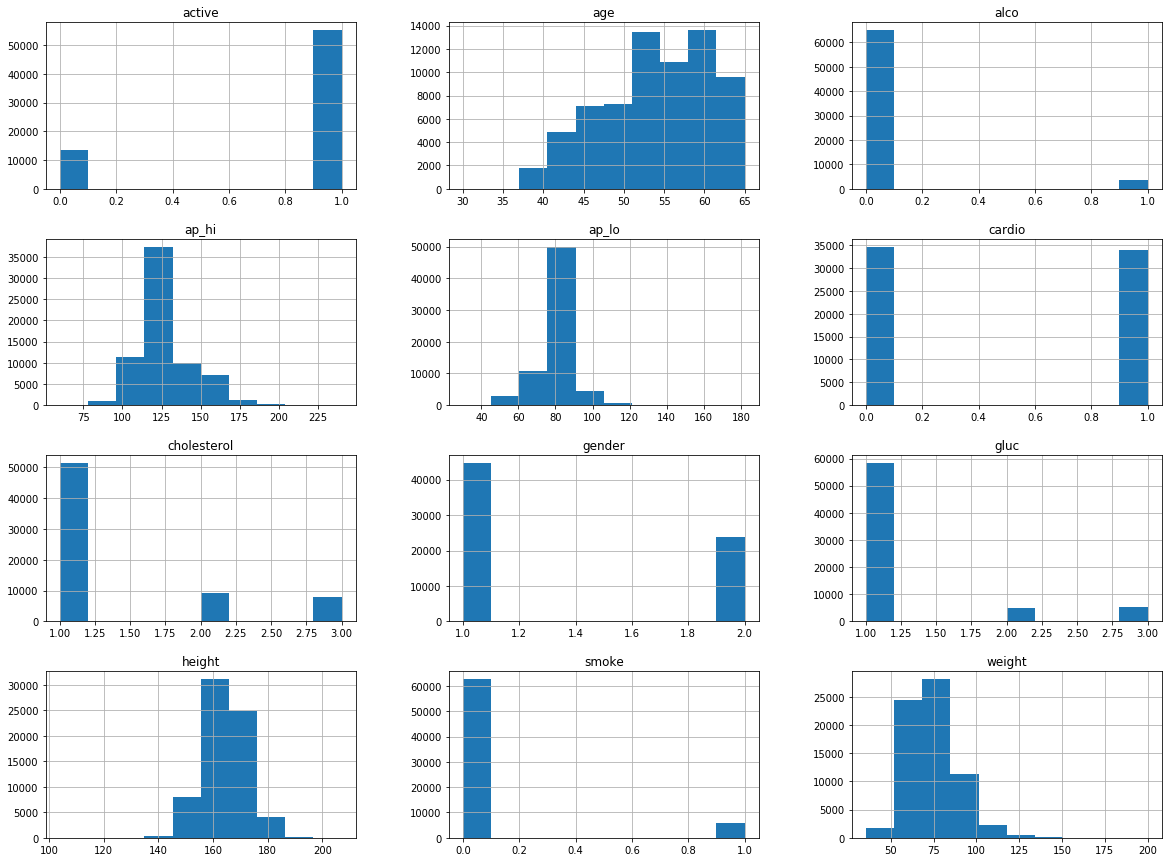

In [110]:
df_mask1.hist(bins=10,figsize=(20,15))
#plt.show()
plt.savefig("Desktop/hist.png")

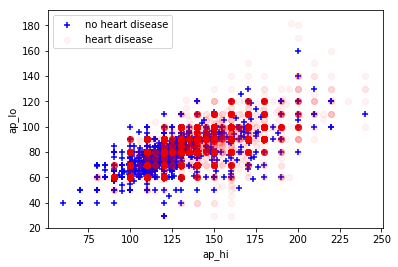

In [121]:
#import pandas as pd
#d2 = df2.sort_values(by ='Yi' )
idx_1 = np.where(df_mask1['cardio'] == 0)
idx_2 = np.where(df_mask1['cardio'] == 1)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(df_mask1.iloc[idx_1]['ap_hi'],df_mask1.iloc[idx_1]['ap_lo'], c='b', marker="+", label='no heart disease')
ax1.scatter(df_mask1.iloc[idx_2]['ap_hi'],df_mask1.iloc[idx_2]['ap_lo'], c='r', marker="o", label='heart disease',alpha=0.05)
plt.xlabel("ap_hi")
plt.ylabel("ap_lo")
plt.legend()
#plt.show()
plt.savefig("Desktop/sc1.png")

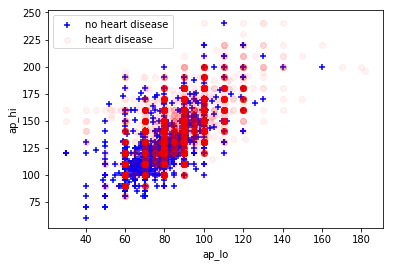

In [120]:
#import pandas as pd
#d2 = df2.sort_values(by ='Yi' )
idx_1 = np.where(df_mask1['cardio'] == 0)
idx_2 = np.where(df_mask1['cardio'] == 1)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(df_mask1.iloc[idx_1]['ap_lo'],df_mask1.iloc[idx_1]['ap_hi'], c='b', marker="+", label='no heart disease')
ax1.scatter(df_mask1.iloc[idx_2]['ap_lo'],df_mask1.iloc[idx_2]['ap_hi'], c='r', marker="o", label='heart disease',alpha=0.05)
plt.xlabel("ap_lo")
plt.ylabel("ap_hi")
plt.legend()
#plt.show()

plt.savefig("Desktop/sc2.png")

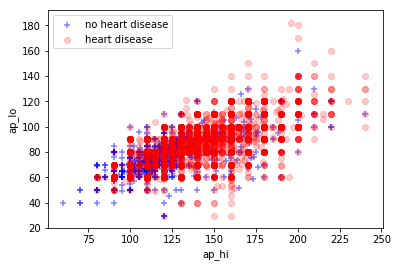

In [118]:
#import pandas as pd
#d2 = df2.sort_values(by ='Yi' )
idx_1 = np.where(df_mask1['cardio'] == 0)
idx_2 = np.where(df_mask1['cardio'] == 1)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(df_mask1.iloc[idx_1]['ap_hi'],df_mask1.iloc[idx_1]['ap_lo'], c='b', marker="+", label='no heart disease', alpha=0.5)
ax1.scatter(df_mask1.iloc[idx_2]['ap_hi'],df_mask1.iloc[idx_2]['ap_lo'], c='r', marker="o", label='heart disease',alpha=0.2)
plt.xlabel("ap_hi")
plt.ylabel("ap_lo")
plt.legend()
#plt.show()

plt.savefig("Desktop/sc3.png")

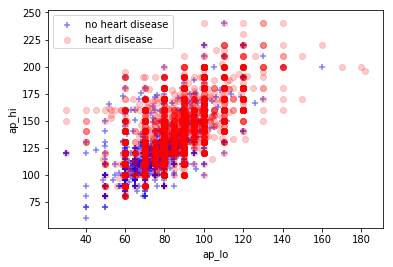

In [119]:
#import pandas as pd
#d2 = df2.sort_values(by ='Yi' )
idx_1 = np.where(df_mask1['cardio'] == 0)
idx_2 = np.where(df_mask1['cardio'] == 1)
fig = plt.figure()
ax1 = fig.add_subplot(111)
ax1.scatter(df_mask1.iloc[idx_1]['ap_lo'],df_mask1.iloc[idx_1]['ap_hi'], c='b', marker="+", label='no heart disease', alpha=0.5)
ax1.scatter(df_mask1.iloc[idx_2]['ap_lo'],df_mask1.iloc[idx_2]['ap_hi'], c='r', marker="o", label='heart disease',alpha=0.2)
plt.xlabel("ap_lo")
plt.ylabel("ap_hi")
plt.legend()

plt.savefig("Desktop/sc4.png")
#plt.show()

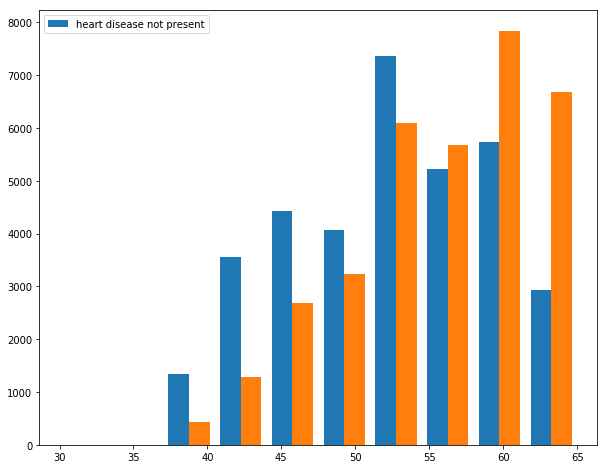

In [136]:
idx_1 = np.where(df_mask1['cardio'] == 0)
idx_2 = np.where(df_mask1['cardio'] == 1)
d_np = df_mask1.iloc[idx_1]['age']
d_p = df_mask1.iloc[idx_2]['age']
plt.figure(figsize=[10,8])
n, bins, patches = plt.hist([d_np, d_p],label="heart disease not present")
plt.legend()
plt.savefig("Desktop/histo_age.png")

The formula is BMI = kg/m2 where kg is a person’s weight in kilograms and m2 is their height in metres squared.

In [140]:
df_mask1['BMI'] = df_mask1['weight']/((df_mask1['height']/100).apply(np.square))

/Users/karanmaheshwari/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


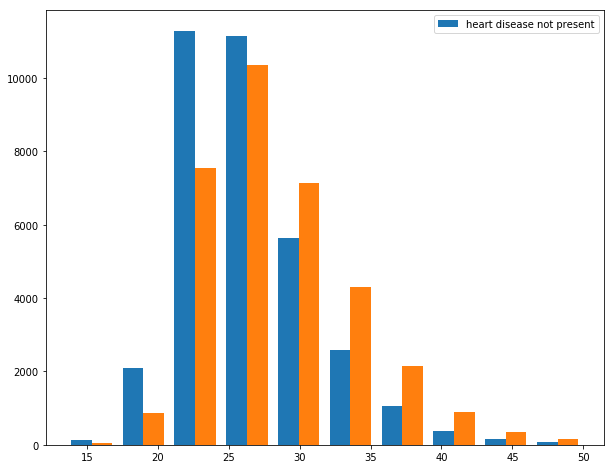

In [153]:
idx_1 = np.where(df_mask1[df_mask1["BMI"]<50]['cardio'] == 0)
idx_2 = np.where(df_mask1[df_mask1["BMI"]<50]['cardio'] == 1)
d_np = df_mask1[df_mask1["BMI"]<50].iloc[idx_1]['BMI']
d_p = df_mask1[df_mask1["BMI"]<50].iloc[idx_2]['BMI']
plt.figure(figsize=[10,8])
n, bins, patches = plt.hist([d_np, d_p],label="heart disease not present",bins=10)
plt.legend()
plt.savefig("Desktop/histo_BMI.png")

In [148]:
df_mask1["BMI"].describe()

count    68630.000000
mean        27.474406
std          5.340555
min         13.520822
25%         23.875115
50%         26.346494
75%         30.119376
max        152.551775
Name: BMI, dtype: float64

In [151]:
df_mask1[df_mask1["BMI"]<50].describe()

age        gender        height        weight         ap_hi  \
count  68424.000000  68424.000000  68424.000000  68424.000000  68424.000000   
mean      53.824389      1.349059    164.449433     73.974189    126.646396   
std        6.769298      0.476676      7.843797     13.927236     16.668734   
min       30.000000      1.000000    120.000000     35.450000     60.000000   
25%       49.000000      1.000000    159.000000     65.000000    120.000000   
50%       54.000000      1.000000    165.000000     72.000000    120.000000   
75%       59.000000      2.000000    170.000000     82.000000    140.000000   
max       65.000000      2.000000    207.000000    180.000000    240.000000   

              ap_lo   cholesterol          gluc         smoke          alco  \
count  68424.000000  68424.000000  68424.000000  68424.000000  68424.000000   
mean      81.288261      1.364039      1.224950      0.088083      0.053358   
std        9.453418      0.678412      0.570729      0.283418      0.224749   
min       30.000000      1.000000      1.000000      0.000000      0.000000   
25%       80.000000      1.000000      1.000000      0.000000      0.000000   
50%       80.000000      1.000000      1.000000      0.000000      0.000000   
75%       90.000000      1.000000      1.000000      0.000000      0.000000   
max      182.000000      3.000000      3.000000      1.000000      1.000000   

             active        cardio           BMI  
count  68424.000000  68424.000000  68424.000000  
mean       0.803358      0.494242     27.384465  
std        0.397462      0.499970      5.040422  
min        0.000000      0.000000     13.520822  
25%        1.000000      0.000000     23.875115  
50%        1.000000      0.000000     26.301053  
75%        1.000000      1.000000     30.116002  
max        1.000000      1.000000     50.000000